In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('housetrain.csv')

##  Cleaning the Data

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

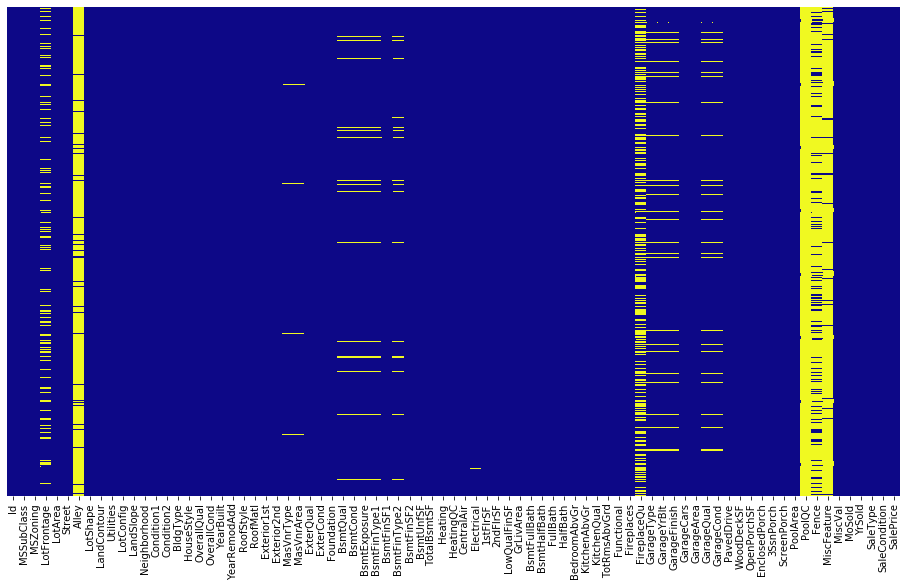

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')

In [3]:
data.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

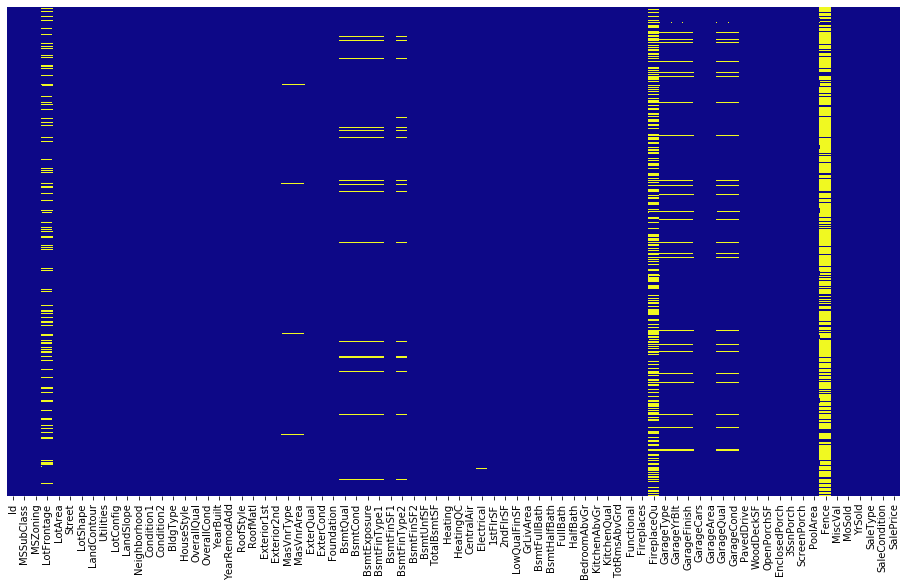

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')

In [4]:
data.drop(['Fence'],axis=1,inplace=True)

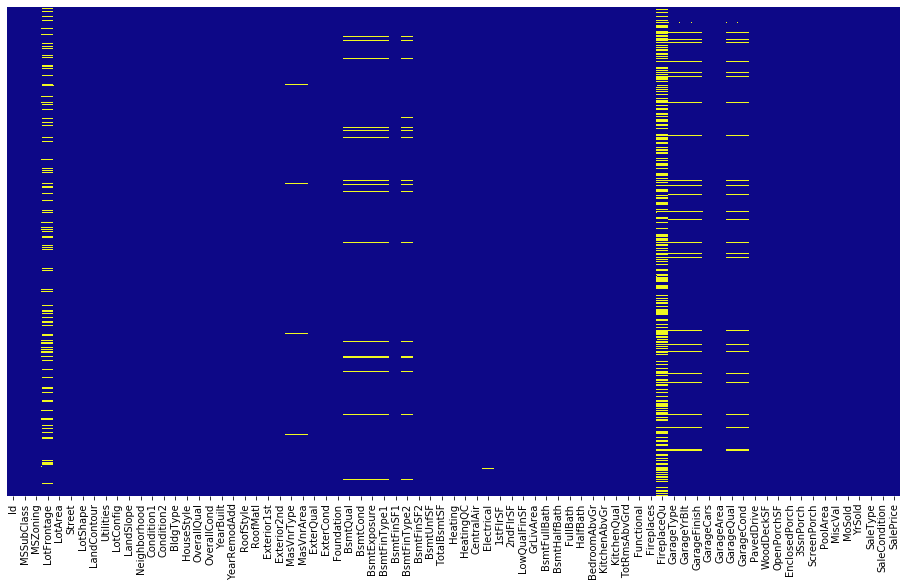

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')

In [8]:
data[data['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,...,99,0,0,0,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,...,0,0,40,0,0,5,2009,WD,Normal,121000


In [7]:
dt=data.corr()

In [8]:
max(dt[dt['LotFrontage']!=1]['LotFrontage'])
#Can be used for later finding LotFrontage
#For now i will fill in the mean

0.4571810019946558

In [9]:
dt['LotFrontage'].mean()

0.16525014430415572

In [10]:
dt[dt['LotFrontage'].isnull()]['LotFrontage']=0.165

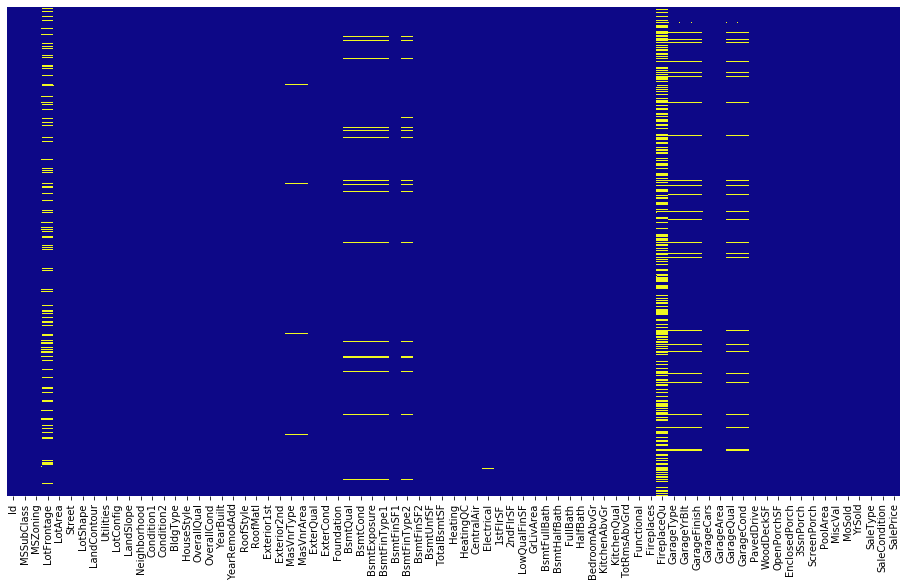

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
si=SimpleImputer(missing_values=np.nan,strategy='mean')

In [11]:
data['LotFrontage'].fillna(value=np.mean(data['LotFrontage']),inplace=True)

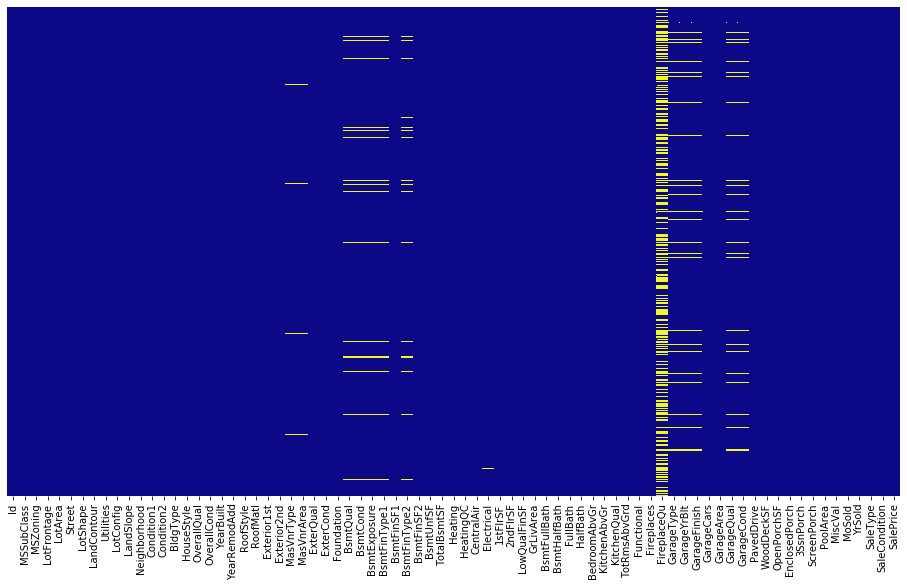

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')


In [12]:
data.drop('FireplaceQu',axis=1,inplace=True)

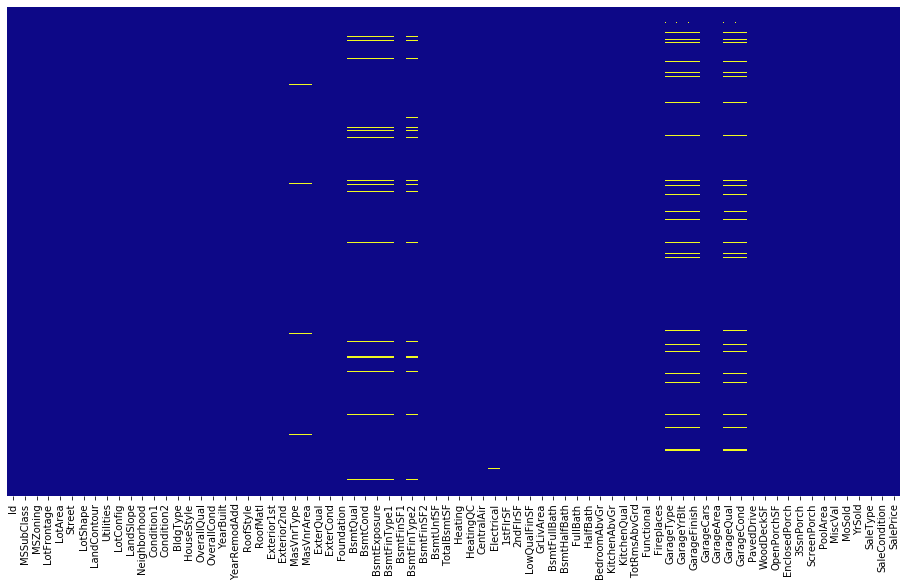

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')


In [17]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [13]:
data['MasVnrType'].isnull().value_counts()

False    1452
True        8
Name: MasVnrType, dtype: int64

In [14]:
data['MasVnrArea'].isnull().value_counts()

False    1452
True        8
Name: MasVnrArea, dtype: int64

In [15]:
data.loc[:,['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0
...,...,...
1455,None,0.0
1456,Stone,119.0
1457,None,0.0
1458,None,0.0


In [16]:
#Filling MasVnrType with most common type and MasVnrArea with mean
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [17]:
data['MasVnrType'].fillna(value='None',inplace=True)

In [18]:
data['MasVnrArea'].fillna(value=np.mean(data['MasVnrArea']),inplace=True)

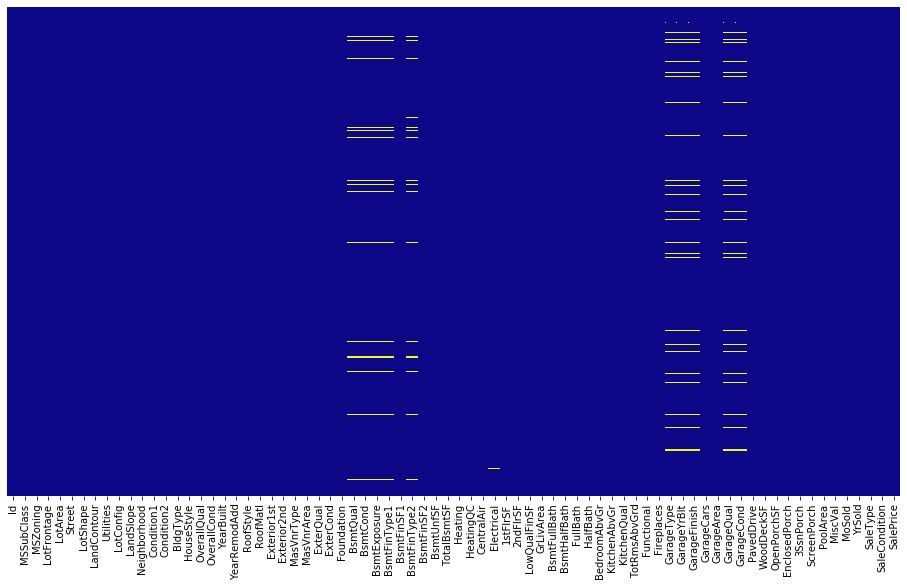

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')


In [24]:
data.loc[:,['BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1
0,Gd,TA,No,GLQ
1,Gd,TA,Gd,ALQ
2,Gd,TA,Mn,GLQ
3,TA,Gd,No,ALQ
4,Gd,TA,Av,GLQ
...,...,...,...,...
1455,Gd,TA,No,Unf
1456,Gd,TA,No,ALQ
1457,TA,Gd,No,GLQ
1458,TA,TA,Mn,GLQ


In [19]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [20]:
data['BsmtQual'].fillna(value='TA',inplace=True)

In [21]:
data['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [22]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [23]:
data['BsmtCond'].fillna(value='TA',inplace=True)

In [24]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [25]:
data['BsmtExposure'].fillna(value='No',inplace=True)

In [26]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [27]:
data['BsmtFinType1'].fillna(value='Unf',inplace=True)

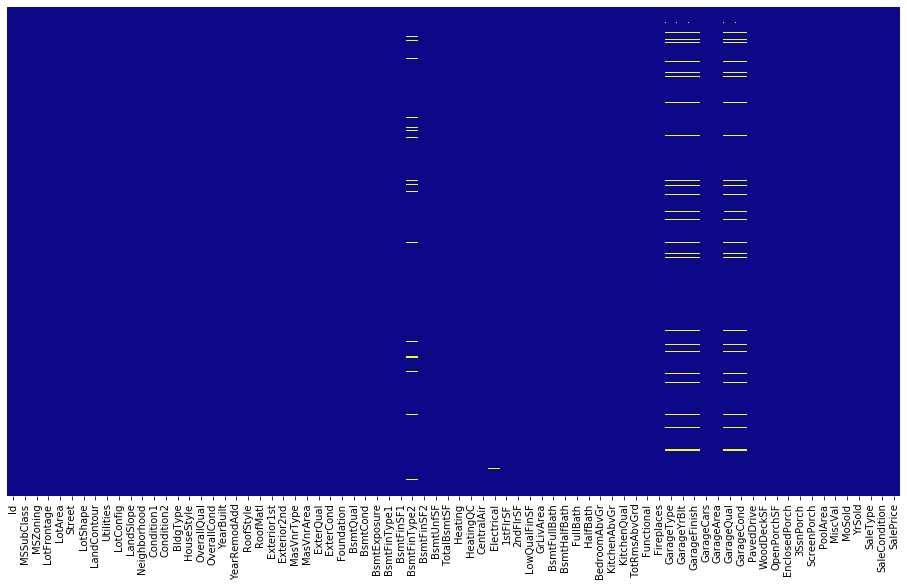

In [58]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')


In [34]:
data.loc[:,['Electrical','BsmtFinType2','GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual', 'GarageCond']]

,Electrical,BsmtFinType2,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,SBrkr,Unf,Attchd,2003.0,RFn,TA,TA
1,SBrkr,Unf,Attchd,1976.0,RFn,TA,TA
2,SBrkr,Unf,Attchd,2001.0,RFn,TA,TA
3,SBrkr,Unf,Detchd,1998.0,Unf,TA,TA
4,SBrkr,Unf,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...
1455,SBrkr,Unf,Attchd,1999.0,RFn,TA,TA
1456,SBrkr,Rec,Attchd,1978.0,Unf,TA,TA
1457,SBrkr,Unf,Attchd,1941.0,RFn,TA,TA
1458,FuseA,Rec,Attchd,1950.0,Unf,TA,TA


In [28]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [29]:
data['Electrical'].fillna(value='SBrkr',inplace=True)

In [30]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [31]:
data['BsmtFinType2'].fillna(value='Unf',inplace=True)

In [32]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [33]:
data['GarageType'].fillna(value='Attchd',inplace=True)

In [34]:
data['GarageYrBlt'].fillna(value=np.mean(data['GarageYrBlt']),inplace=True)

In [35]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [36]:
data['GarageFinish'].fillna(value='Unf',inplace=True)

In [37]:
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [38]:
data['GarageQual'].fillna(value='TA',inplace=True)

In [39]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [40]:
data['GarageCond'].fillna(value='TA',inplace=True)

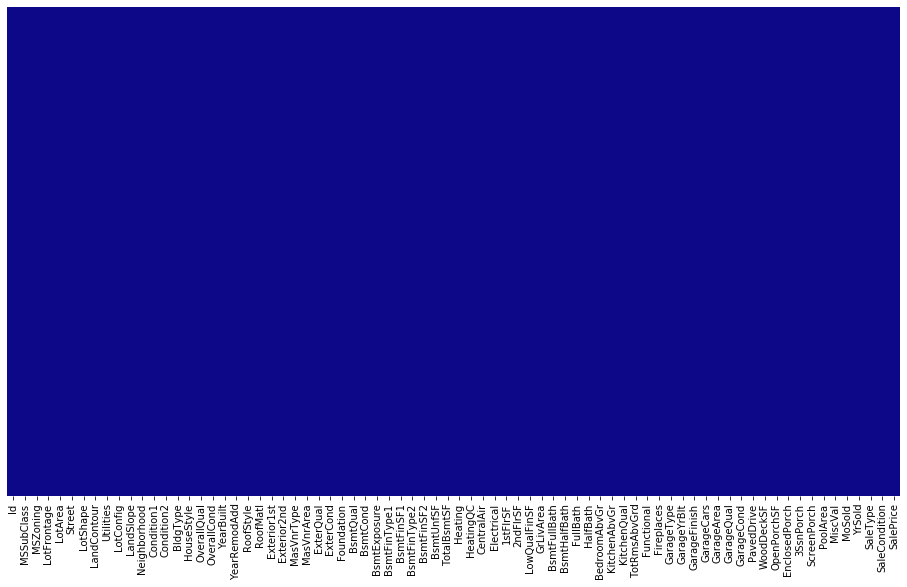

In [41]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='plasma')


## We have gotten rid of some columns with high number of NaN values and in other columns we have filled in the most common and mean values. Now we can focus on separating the class variables and numerical variables and processing on them.

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
col=list(data.columns)


In [42]:
col=data.select_dtypes(include=['object'])

In [43]:
col

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [44]:
new=pd.get_dummies(col.loc[:,list(col.columns)],drop_first=True)

In [45]:
new

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
data.drop(list(col.columns),axis=1,inplace=True)

In [47]:
data.drop('Id',axis=1,inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [49]:
new.info()
y=data['SalePrice']
data.drop('SalePrice',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 196 entries, MSZoning_FV to SaleCondition_Partial
dtypes: uint8(196)
memory usage: 279.6 KB


## In data we have all the numerical variables and in new we have all the categorical variables encoded.
## Now we can  split the data and train

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=101)

In [52]:
X_train_cat,X_test_cat,y_train_cat,y_test_cat=train_test_split(new,y,test_size=0.3,random_state=101)

In [53]:
X_train_cat

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1312,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1408,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1165,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1346,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
399,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
75,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
599,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1361,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [54]:
x_train=pd.concat([X_train,X_train_cat],axis=1)

In [55]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1312,60,70.049958,9572,8,5,1990,1990,336.0,482,0,...,0,0,0,0,1,0,0,0,1,0
1408,70,60.000000,7740,4,7,1910,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1165,20,79.000000,9541,7,5,2009,2009,268.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1346,20,70.049958,20781,7,7,1968,2003,0.0,297,68,...,0,0,0,0,1,0,0,0,1,0
399,60,65.000000,8125,7,5,2006,2007,100.0,812,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,60,70.049958,16545,8,5,1998,1998,731.0,781,0,...,0,0,0,0,1,0,0,0,1,0
75,180,21.000000,1596,4,5,1973,1973,0.0,462,0,...,0,0,0,0,1,0,0,0,1,0
599,160,24.000000,1950,6,6,1980,1980,0.0,81,612,...,0,0,0,0,0,0,0,0,1,0
1361,20,124.000000,16158,7,5,2005,2005,16.0,1274,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
x_test=pd.concat([X_test,X_test_cat],axis=1)

In [57]:
x_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1054,60,90.000000,11367,8,5,2002,2002,210.000000,932,0,...,0,0,0,0,1,0,0,0,1,0
361,50,70.049958,9144,5,5,1940,1982,0.000000,399,0,...,0,0,0,0,1,0,0,0,1,0
1282,20,61.000000,8800,5,7,1977,2008,0.000000,532,144,...,0,0,0,0,1,0,0,0,1,0
161,60,110.000000,13688,9,5,2003,2004,664.000000,1016,0,...,0,0,0,0,1,0,0,0,1,0
515,20,94.000000,12220,10,5,2009,2009,305.000000,1436,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,50,70.049958,159000,6,7,1958,2006,472.000000,697,0,...,0,0,0,0,1,0,0,0,1,0
467,70,79.000000,9480,5,7,1942,1995,224.000000,386,0,...,0,0,0,0,1,0,0,0,1,0
650,60,65.000000,8125,7,6,2007,2007,103.685262,0,0,...,0,0,0,0,1,0,0,0,1,0
48,190,33.000000,4456,4,5,1920,2008,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,1


In [58]:
y_train

1312    302000
1408    125500
1165    233170
1346    262500
399     241000
         ...  
1417    340000
75       91000
599     151000
1361    260000
863     132500
Name: SalePrice, Length: 1022, dtype: int64

In [59]:
y_test

1054    255000
361     145000
1282    150500
161     412500
515     402861
         ...  
249     277000
467     146500
650     205950
48      113000
454     188000
Name: SalePrice, Length: 438, dtype: int64

## Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
X_train=sc.transform(x_train)

In [64]:
X_test=sc.transform(x_test)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
rf=RandomForestRegressor()

In [65]:
X_train.shape

(1022, 233)

In [66]:
y_train.shape

(1022,)

In [69]:
X_test.shape

(438, 233)

In [68]:
y_test.shape

(438,)

In [121]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
pred=rf.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
len(pred)

438

In [123]:
print(mean_squared_error(y_test,pred))
mse_rf=mean_squared_error(y_test,pred)

955540891.3407338


In [124]:
from sklearn.svm import SVR

In [93]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid={'kernel':['rbf','linear'],'C':[1,0.1,0.01,0.001,10,0.0001],'degree':[2,3,4]}

In [127]:
gs=GridSearchCV(estimator=SVR(),param_grid=param_grid,verbose=10)

In [128]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=1, degree=2, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=1, degree=2, kernel=rbf, score=-0.080, total=   0.5s
[CV] C=1, degree=2, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=1, degree=2, kernel=rbf, score=-0.137, total=   0.6s
[CV] C=1, degree=2, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=1, degree=2, kernel=rbf, score=-0.031, total=   0.5s
[CV] C=1, degree=2, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] .......... C=1, degree=2, kernel=rbf, score=-0.021, total=   0.6s
[CV] C=1, degree=2, kernel=rbf .......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV] .......... C=1, degree=2, kernel=rbf, score=-0.014, total=   0.6s
[CV] C=1, degree=2, kernel=linear ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV] ........ C=1, degree=2, kernel=linear, score=0.107, total=   0.5s
[CV] C=1, degree=2, kernel=linear ....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s


[CV] ........ C=1, degree=2, kernel=linear, score=0.096, total=   0.5s
[CV] C=1, degree=2, kernel=linear ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.7s remaining:    0.0s


[CV] ........ C=1, degree=2, kernel=linear, score=0.142, total=   0.5s
[CV] C=1, degree=2, kernel=linear ....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.2s remaining:    0.0s


[CV] ........ C=1, degree=2, kernel=linear, score=0.152, total=   0.4s
[CV] C=1, degree=2, kernel=linear ....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.6s remaining:    0.0s


[CV] ........ C=1, degree=2, kernel=linear, score=0.191, total=   0.5s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] .......... C=1, degree=3, kernel=rbf, score=-0.080, total=   0.5s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] .......... C=1, degree=3, kernel=rbf, score=-0.137, total=   0.5s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] .......... C=1, degree=3, kernel=rbf, score=-0.031, total=   0.5s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] .......... C=1, degree=3, kernel=rbf, score=-0.021, total=   0.6s
[CV] C=1, degree=3, kernel=rbf .......................................
[CV] .......... C=1, degree=3, kernel=rbf, score=-0.014, total=   0.6s
[CV] C=1, degree=3, kernel=linear ....................................
[CV] ........ C=1, degree=3, kernel=linear, score=0.107, total=   0.5s
[CV] C=1, degree=3, kernel=linear ....................................
[CV] .

[CV] .... C=0.01, degree=2, kernel=linear, score=-0.029, total=   0.5s
[CV] C=0.01, degree=2, kernel=linear .................................
[CV] .... C=0.01, degree=2, kernel=linear, score=-0.020, total=   0.4s
[CV] C=0.01, degree=2, kernel=linear .................................
[CV] .... C=0.01, degree=2, kernel=linear, score=-0.012, total=   0.5s
[CV] C=0.01, degree=3, kernel=rbf ....................................
[CV] ....... C=0.01, degree=3, kernel=rbf, score=-0.080, total=   0.6s
[CV] C=0.01, degree=3, kernel=rbf ....................................
[CV] ....... C=0.01, degree=3, kernel=rbf, score=-0.137, total=   0.5s
[CV] C=0.01, degree=3, kernel=rbf ....................................
[CV] ....... C=0.01, degree=3, kernel=rbf, score=-0.032, total=   0.5s
[CV] C=0.01, degree=3, kernel=rbf ....................................
[CV] ....... C=0.01, degree=3, kernel=rbf, score=-0.022, total=   0.5s
[CV] C=0.01, degree=3, kernel=rbf ....................................
[CV] .

[CV] ....... C=10, degree=2, kernel=linear, score=0.627, total=   0.5s
[CV] C=10, degree=2, kernel=linear ...................................
[CV] ....... C=10, degree=2, kernel=linear, score=0.664, total=   0.5s
[CV] C=10, degree=2, kernel=linear ...................................
[CV] ....... C=10, degree=2, kernel=linear, score=0.638, total=   0.5s
[CV] C=10, degree=2, kernel=linear ...................................
[CV] ....... C=10, degree=2, kernel=linear, score=0.647, total=   0.5s
[CV] C=10, degree=2, kernel=linear ...................................
[CV] ....... C=10, degree=2, kernel=linear, score=0.721, total=   0.5s
[CV] C=10, degree=3, kernel=rbf ......................................
[CV] ......... C=10, degree=3, kernel=rbf, score=-0.077, total=   0.5s
[CV] C=10, degree=3, kernel=rbf ......................................
[CV] ......... C=10, degree=3, kernel=rbf, score=-0.131, total=   0.6s
[CV] C=10, degree=3, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.01, 0.001, 10, 0.0001],
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [129]:
pred=gs.predict(X_test)

In [130]:
print(mean_squared_error(y_test,pred))
mse_svr=mean_squared_error(y_test,pred)

2122026723.927332


In [131]:
mse_rf-mse_svr

-1166485832.5865982

In [132]:
param_grid={'n_estimators':[100,200,300],'max_depth':[30,40,50,60,10]}

In [133]:
#mse_rf more prominent
gs=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,verbose=10)

In [134]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] max_depth=30, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=30, n_estimators=100, score=0.866, total=   3.4s
[CV] max_depth=30, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=100, score=0.733, total=   3.4s
[CV] max_depth=30, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=100, score=0.895, total=   3.4s
[CV] max_depth=30, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.1s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=100, score=0.831, total=   3.2s
[CV] max_depth=30, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.3s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=100, score=0.879, total=   3.3s
[CV] max_depth=30, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.6s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=200, score=0.869, total=   6.1s
[CV] max_depth=30, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.7s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=200, score=0.738, total=   6.4s
[CV] max_depth=30, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   29.1s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=200, score=0.895, total=   6.5s
[CV] max_depth=30, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   35.6s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=200, score=0.825, total=   6.6s
[CV] max_depth=30, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   42.2s remaining:    0.0s


[CV] ...... max_depth=30, n_estimators=200, score=0.875, total=   5.8s
[CV] max_depth=30, n_estimators=300 ..................................
[CV] ...... max_depth=30, n_estimators=300, score=0.877, total=   9.1s
[CV] max_depth=30, n_estimators=300 ..................................
[CV] ...... max_depth=30, n_estimators=300, score=0.737, total=  10.3s
[CV] max_depth=30, n_estimators=300 ..................................
[CV] ...... max_depth=30, n_estimators=300, score=0.892, total=  10.2s
[CV] max_depth=30, n_estimators=300 ..................................
[CV] ...... max_depth=30, n_estimators=300, score=0.835, total=  10.4s
[CV] max_depth=30, n_estimators=300 ..................................
[CV] ...... max_depth=30, n_estimators=300, score=0.876, total=  10.4s
[CV] max_depth=40, n_estimators=100 ..................................
[CV] ...... max_depth=40, n_estimators=100, score=0.869, total=   3.5s
[CV] max_depth=40, n_estimators=100 ..................................
[CV] .

[CV] ...... max_depth=10, n_estimators=200, score=0.894, total=   5.7s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.835, total=   5.7s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.872, total=   5.7s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] ...... max_depth=10, n_estimators=300, score=0.871, total=   8.5s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] ...... max_depth=10, n_estimators=300, score=0.750, total=   8.5s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] ...... max_depth=10, n_estimators=300, score=0.894, total=   8.0s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] ...... max_depth=10, n_estimators=300, score=0.833, total=   7.8s
[CV] max_depth=10, n_estimators=300 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  8.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [135]:
gs.best_score_

0.847018881577313

In [177]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 100}

The above RandomForest is almost okay we can acheive more by removing the outliers

In [136]:
pred=gs.predict(X_test)

In [137]:
print(mean_squared_error(y_test,pred))

996326176.9569787


In [66]:
data=pd.concat([data,y],axis=1)

In [67]:
corr1=data.corr()['SalePrice']

In [68]:
corr_col=list(corr1.index)

In [69]:
notreq=[]
for x in corr_col:
    if(abs(corr1)[x]<0.1):
        notreq.append(x)

In [70]:
notreq

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [75]:

#data.drop(notreq,axis=1,inplace=True)
#data.drop(['SalePrice'],axis=1,inplace=True)
data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,1,8,0,2003.0,2,548,0,61,0,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,1,6,1,1976.0,2,460,298,0,0,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,1,6,1,2001.0,2,608,0,42,0,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,7,1,1998.0,3,642,0,35,272,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,1,9,1,2000.0,3,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,1,7,1,1999.0,2,460,0,40,0,0
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,1,7,2,1978.0,2,500,349,0,0,0
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,1,9,2,1941.0,1,252,0,60,0,0
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,1,5,0,1950.0,1,240,366,0,112,0


In [76]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=101)

In [77]:
X_train_cat,X_test_cat,y_train_cat,y_test_cat=train_test_split(new,y,test_size=0.3,random_state=101)

In [78]:
x_train=pd.concat([X_train,X_train_cat],axis=1)

In [79]:
x_test=pd.concat([X_test,X_test_cat],axis=1)

In [80]:
x_train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1312,70.049958,9572,8,1990,1990,336.0,482,971,1453,1453,...,0,0,0,0,1,0,0,0,1,0
1408,60.000000,7740,4,1910,1950,0.0,0,622,622,741,...,0,0,0,0,1,0,0,0,1,0
1165,79.000000,9541,7,2009,2009,268.0,0,1502,1502,1502,...,0,0,1,0,0,0,0,0,0,1
1346,70.049958,20781,7,1968,2003,0.0,297,1203,1568,2156,...,0,0,0,0,1,0,0,0,1,0
399,65.000000,8125,7,2006,2007,100.0,812,280,1092,1112,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,70.049958,16545,8,1998,1998,731.0,781,503,1284,1310,...,0,0,0,0,1,0,0,0,1,0
75,21.000000,1596,4,1973,1973,0.0,462,0,462,526,...,0,0,0,0,1,0,0,0,1,0
599,24.000000,1950,6,1980,1980,0.0,81,23,716,716,...,0,0,0,0,0,0,0,0,1,0
1361,124.000000,16158,7,2005,2005,16.0,1274,256,1530,1530,...,0,0,0,0,1,0,0,0,1,0


In [81]:
x_test

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1054,90.000000,11367,8,2002,2002,210.000000,932,133,1065,1091,...,0,0,0,0,1,0,0,0,1,0
361,70.049958,9144,5,1940,1982,0.000000,399,484,883,988,...,0,0,0,0,1,0,0,0,1,0
1282,61.000000,8800,5,1977,2008,0.000000,532,364,1040,1040,...,0,0,0,0,1,0,0,0,1,0
161,110.000000,13688,9,2003,2004,664.000000,1016,556,1572,1572,...,0,0,0,0,1,0,0,0,1,0
515,94.000000,12220,10,2009,2009,305.000000,1436,570,2006,2020,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,70.049958,159000,6,1958,2006,472.000000,697,747,1444,1444,...,0,0,0,0,1,0,0,0,1,0
467,79.000000,9480,5,1942,1995,224.000000,386,342,728,888,...,0,0,0,0,1,0,0,0,1,0
650,65.000000,8125,7,2007,2007,103.685262,0,813,813,822,...,0,0,0,0,1,0,0,0,1,0
48,33.000000,4456,4,1920,2008,0.000000,0,736,736,736,...,0,0,1,0,0,0,0,0,0,1


In [82]:
sc=StandardScaler()

In [83]:
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
X_train=sc.transform(x_train)

In [85]:
X_test=sc.transform(x_test)

In [178]:
rf=RandomForestRegressor(n_estimators=100,max_depth=10)

In [179]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [180]:
pred=rf.predict(X_test)

In [181]:
print(mean_squared_error(y_test,pred))

1057414744.9446518


In [182]:
from sklearn.model_selection import cross_val_score

In [184]:
c=cross_val_score(estimator=rf,X=X_train,y=y_train,cv=10,verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.873, total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .................................... , score=0.865, total=   2.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s


[CV] .................................... , score=0.886, total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s remaining:    0.0s


[CV] .................................... , score=0.664, total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.4s remaining:    0.0s


[CV] .................................... , score=0.906, total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.0s remaining:    0.0s


[CV] .................................... , score=0.875, total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.6s remaining:    0.0s


[CV] .................................... , score=0.820, total=   3.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.6s remaining:    0.0s


[CV] .................................... , score=0.855, total=   2.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.5s remaining:    0.0s


[CV] .................................... , score=0.911, total=   2.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   24.4s remaining:    0.0s


[CV] .................................... , score=0.827, total=   2.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   27.4s finished


In [185]:
c.mean()

0.8482929554634419

In [186]:
c.std()

0.06770743814810885

#### Trying PCA

In [86]:
from sklearn.decomposition import PCA

In [87]:
from sklearn.pipeline import Pipeline

In [88]:
Pipe=Pipeline(steps=[('pca',PCA()),('rf',RandomForestRegressor())])

In [97]:
param_grid={'rf__n_estimators':[100,200],'rf__max_depth':[10,20,30,40,50,60],'rf__max_features':['sqrt','log2'],'pca__n_components':list(range(15,61))}

In [99]:
gs=GridSearchCV(estimator=Pipe,param_grid=param_grid,verbose=10)

In [100]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 1104 candidates, totalling 5520 fits
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100, score=0.793, total=   1.6s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100, score=0.807, total=   0.5s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100, score=0.809, total=   0.5s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100, score=0.761, total=   0.5s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=100, score=0.813, total=   0.5s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.786, total=   1.0s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.813, total=   1.1s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.805, total=   1.1s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.8s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.780, total=   0.8s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.6s remaining:    0.0s


[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.819, total=   0.9s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.794, total=   0.5s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.814, total=   0.5s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.815, total=   0.4s
[CV] pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.771, total=   0.6s
[CV] pca__n_components=15, rf__max_depth=10, rf__m

[CV]  pca__n_components=15, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.827, total=   1.3s
[CV] pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.790, total=   0.7s
[CV] pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.814, total=   0.6s
[CV] pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.816, total=   0.6s
[CV] pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.796, total=   0.7s
[CV] pca__n_components=15, rf__max_depth=30, rf__m

[CV]  pca__n_components=15, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.842, total=   1.3s
[CV] pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.777, total=   0.6s
[CV] pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.815, total=   0.6s
[CV] pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.804, total=   0.6s
[CV] pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=15, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.775, total=   0.7s
[CV] pca__n_components=15, rf__max_depth=50, rf__m

[CV]  pca__n_components=16, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.841, total=   1.2s
[CV] pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.798, total=   0.6s
[CV] pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.816, total=   0.6s
[CV] pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.818, total=   0.6s
[CV] pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.789, total=   0.6s
[CV] pca__n_components=16, rf__max_depth=10, rf__m

[CV]  pca__n_components=16, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.843, total=   1.5s
[CV] pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.811, total=   0.7s
[CV] pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.808, total=   0.7s
[CV] pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.821, total=   0.8s
[CV] pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.797, total=   0.7s
[CV] pca__n_components=16, rf__max_depth=30, rf__m

[CV]  pca__n_components=16, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.847, total=   1.4s
[CV] pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.817, total=   0.7s
[CV] pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.818, total=   0.7s
[CV] pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.830, total=   0.7s
[CV] pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=16, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.801, total=   0.7s
[CV] pca__n_components=16, rf__max_depth=50, rf__m

[CV]  pca__n_components=17, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.834, total=   1.2s
[CV] pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.792, total=   0.6s
[CV] pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.823, total=   0.6s
[CV] pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.801, total=   0.6s
[CV] pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.781, total=   0.7s
[CV] pca__n_components=17, rf__max_depth=10, rf__m

[CV]  pca__n_components=17, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.846, total=   1.3s
[CV] pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.818, total=   0.7s
[CV] pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.814, total=   0.7s
[CV] pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.823, total=   0.6s
[CV] pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.786, total=   0.7s
[CV] pca__n_components=17, rf__max_depth=30, rf__m

[CV]  pca__n_components=17, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.839, total=   1.5s
[CV] pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.808, total=   0.7s
[CV] pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.833, total=   0.8s
[CV] pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.815, total=   0.7s
[CV] pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=17, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.793, total=   0.8s
[CV] pca__n_components=17, rf__max_depth=50, rf__m

[CV]  pca__n_components=18, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.829, total=   1.3s
[CV] pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.786, total=   0.6s
[CV] pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.819, total=   0.6s
[CV] pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.805, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.773, total=   0.6s
[CV] pca__n_components=18, rf__max_depth=10, rf__m

[CV]  pca__n_components=18, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.833, total=   1.4s
[CV] pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.792, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.809, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.814, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.789, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=30, rf__m

[CV]  pca__n_components=18, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.844, total=   1.4s
[CV] pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.791, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.810, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.820, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=18, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.779, total=   0.7s
[CV] pca__n_components=18, rf__max_depth=50, rf__m

[CV]  pca__n_components=19, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.830, total=   1.3s
[CV] pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.781, total=   0.6s
[CV] pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.805, total=   0.6s
[CV] pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.805, total=   0.6s
[CV] pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.777, total=   0.6s
[CV] pca__n_components=19, rf__max_depth=10, rf__m

[CV]  pca__n_components=19, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.829, total=   1.4s
[CV] pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.793, total=   0.7s
[CV] pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.802, total=   0.7s
[CV] pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.807, total=   0.7s
[CV] pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.777, total=   0.7s
[CV] pca__n_components=19, rf__max_depth=30, rf__m

[CV]  pca__n_components=19, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.833, total=   1.5s
[CV] pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.784, total=   0.7s
[CV] pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.810, total=   0.8s
[CV] pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.819, total=   0.7s
[CV] pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=19, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.757, total=   0.7s
[CV] pca__n_components=19, rf__max_depth=50, rf__m

[CV]  pca__n_components=20, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.825, total=   1.1s
[CV] pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.791, total=   0.6s
[CV] pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.811, total=   0.6s
[CV] pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.808, total=   0.6s
[CV] pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.758, total=   0.6s
[CV] pca__n_components=20, rf__max_depth=10, rf__m

[CV]  pca__n_components=20, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.830, total=   1.4s
[CV] pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.790, total=   0.7s
[CV] pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.813, total=   0.6s
[CV] pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.805, total=   0.7s
[CV] pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.758, total=   0.7s
[CV] pca__n_components=20, rf__max_depth=30, rf__m

[CV]  pca__n_components=20, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.829, total=   1.4s
[CV] pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.781, total=   0.7s
[CV] pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.818, total=   0.8s
[CV] pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.818, total=   0.7s
[CV] pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=20, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.765, total=   0.8s
[CV] pca__n_components=20, rf__max_depth=50, rf__m

[CV]  pca__n_components=21, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.815, total=   1.2s
[CV] pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.778, total=   0.6s
[CV] pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.806, total=   0.6s
[CV] pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.792, total=   0.6s
[CV] pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.744, total=   0.6s
[CV] pca__n_components=21, rf__max_depth=10, rf__m

[CV]  pca__n_components=21, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.821, total=   1.4s
[CV] pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.8s
[CV] pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.816, total=   0.7s
[CV] pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.809, total=   0.7s
[CV] pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.8s
[CV] pca__n_components=21, rf__max_depth=30, rf__m

[CV]  pca__n_components=21, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.828, total=   1.5s
[CV] pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.795, total=   0.7s
[CV] pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.822, total=   0.8s
[CV] pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.799, total=   0.8s
[CV] pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=21, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.766, total=   0.7s
[CV] pca__n_components=21, rf__max_depth=50, rf__m

[CV]  pca__n_components=22, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.817, total=   1.2s
[CV] pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.762, total=   0.6s
[CV] pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.802, total=   0.6s
[CV] pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.782, total=   0.6s
[CV] pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.752, total=   0.7s
[CV] pca__n_components=22, rf__max_depth=10, rf__m

[CV]  pca__n_components=22, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.826, total=   1.4s
[CV] pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.768, total=   0.7s
[CV] pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.805, total=   0.7s
[CV] pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.799, total=   0.7s
[CV] pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.751, total=   0.7s
[CV] pca__n_components=22, rf__max_depth=30, rf__m

[CV]  pca__n_components=22, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.829, total=   1.4s
[CV] pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.777, total=   0.7s
[CV] pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.807, total=   0.7s
[CV] pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.804, total=   0.8s
[CV] pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=22, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.750, total=   0.8s
[CV] pca__n_components=22, rf__max_depth=50, rf__m

[CV]  pca__n_components=23, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.816, total=   1.2s
[CV] pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.6s
[CV] pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.818, total=   0.6s
[CV] pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.781, total=   0.6s
[CV] pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=10, rf__m

[CV]  pca__n_components=23, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.823, total=   1.5s
[CV] pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.773, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.807, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.788, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.6s
[CV] pca__n_components=23, rf__max_depth=30, rf__m

[CV]  pca__n_components=23, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.816, total=   1.4s
[CV] pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.781, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.795, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.802, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=23, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.765, total=   0.7s
[CV] pca__n_components=23, rf__max_depth=50, rf__m

[CV]  pca__n_components=24, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.802, total=   1.0s
[CV] pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.762, total=   0.5s
[CV] pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.785, total=   0.6s
[CV] pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.788, total=   0.5s
[CV] pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.744, total=   0.6s
[CV] pca__n_components=24, rf__max_depth=10, rf__m

[CV]  pca__n_components=24, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.809, total=   1.4s
[CV] pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.758, total=   0.8s
[CV] pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.805, total=   0.7s
[CV] pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.796, total=   0.7s
[CV] pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.756, total=   0.7s
[CV] pca__n_components=24, rf__max_depth=30, rf__m

[CV]  pca__n_components=24, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.820, total=   1.4s
[CV] pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.755, total=   0.7s
[CV] pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.812, total=   0.7s
[CV] pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.799, total=   0.7s
[CV] pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=24, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.762, total=   0.7s
[CV] pca__n_components=24, rf__max_depth=50, rf__m

[CV]  pca__n_components=25, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.824, total=   1.4s
[CV] pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.749, total=   0.6s
[CV] pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.791, total=   0.6s
[CV] pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.773, total=   0.6s
[CV] pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.750, total=   0.6s
[CV] pca__n_components=25, rf__max_depth=10, rf__m

[CV]  pca__n_components=25, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.828, total=   1.6s
[CV] pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.764, total=   0.8s
[CV] pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.815, total=   0.7s
[CV] pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.780, total=   0.6s
[CV] pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.763, total=   0.7s
[CV] pca__n_components=25, rf__max_depth=30, rf__m

[CV]  pca__n_components=25, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.825, total=   1.4s
[CV] pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.755, total=   0.7s
[CV] pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.803, total=   0.7s
[CV] pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.777, total=   0.7s
[CV] pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=25, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.756, total=   0.7s
[CV] pca__n_components=25, rf__max_depth=50, rf__m

[CV]  pca__n_components=26, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.824, total=   1.4s
[CV] pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.750, total=   0.7s
[CV] pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.780, total=   0.6s
[CV] pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.769, total=   0.6s
[CV] pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.735, total=   0.6s
[CV] pca__n_components=26, rf__max_depth=10, rf__m

[CV]  pca__n_components=26, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.822, total=   1.6s
[CV] pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.749, total=   0.7s
[CV] pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.808, total=   0.7s
[CV] pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.776, total=   0.7s
[CV] pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.737, total=   0.7s
[CV] pca__n_components=26, rf__max_depth=30, rf__m

[CV]  pca__n_components=26, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.826, total=   1.6s
[CV] pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.751, total=   0.8s
[CV] pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.796, total=   0.7s
[CV] pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.786, total=   0.8s
[CV] pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=26, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.759, total=   0.8s
[CV] pca__n_components=26, rf__max_depth=50, rf__m

[CV]  pca__n_components=27, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.807, total=   1.4s
[CV] pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.734, total=   0.6s
[CV] pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.794, total=   0.6s
[CV] pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.774, total=   0.6s
[CV] pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.729, total=   0.6s
[CV] pca__n_components=27, rf__max_depth=10, rf__m

[CV]  pca__n_components=27, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.825, total=   1.6s
[CV] pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.738, total=   0.7s
[CV] pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.805, total=   0.8s
[CV] pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.769, total=   0.8s
[CV] pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.721, total=   0.8s
[CV] pca__n_components=27, rf__max_depth=30, rf__m

[CV]  pca__n_components=27, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.827, total=   1.5s
[CV] pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.772, total=   0.7s
[CV] pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.810, total=   0.6s
[CV] pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.769, total=   0.6s
[CV] pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=27, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.725, total=   0.7s
[CV] pca__n_components=27, rf__max_depth=50, rf__m

[CV]  pca__n_components=28, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.810, total=   1.3s
[CV] pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.740, total=   0.6s
[CV] pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.6s
[CV] pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.769, total=   0.6s
[CV] pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.727, total=   0.6s
[CV] pca__n_components=28, rf__max_depth=10, rf__m

[CV]  pca__n_components=28, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.817, total=   1.3s
[CV] pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.742, total=   0.8s
[CV] pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.798, total=   0.7s
[CV] pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.7s
[CV] pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.735, total=   0.7s
[CV] pca__n_components=28, rf__max_depth=30, rf__m

[CV]  pca__n_components=28, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.812, total=   1.6s
[CV] pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.753, total=   0.8s
[CV] pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.772, total=   0.8s
[CV] pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.781, total=   0.8s
[CV] pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=28, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.719, total=   0.7s
[CV] pca__n_components=28, rf__max_depth=50, rf__m

[CV]  pca__n_components=29, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.803, total=   1.4s
[CV] pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.743, total=   0.6s
[CV] pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.757, total=   0.7s
[CV] pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.751, total=   0.6s
[CV] pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.707, total=   0.6s
[CV] pca__n_components=29, rf__max_depth=10, rf__m

[CV]  pca__n_components=29, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.814, total=   1.7s
[CV] pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.731, total=   0.8s
[CV] pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.808, total=   0.7s
[CV] pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.769, total=   0.8s
[CV] pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.732, total=   0.8s
[CV] pca__n_components=29, rf__max_depth=30, rf__m

[CV]  pca__n_components=29, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.808, total=   1.6s
[CV] pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.729, total=   0.7s
[CV] pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.782, total=   0.7s
[CV] pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.7s
[CV] pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=29, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.739, total=   0.8s
[CV] pca__n_components=29, rf__max_depth=50, rf__m

[CV]  pca__n_components=30, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.798, total=   1.4s
[CV] pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.730, total=   0.6s
[CV] pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.797, total=   0.6s
[CV] pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.709, total=   0.6s
[CV] pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.702, total=   0.6s
[CV] pca__n_components=30, rf__max_depth=10, rf__m

[CV]  pca__n_components=30, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.810, total=   1.6s
[CV] pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.730, total=   0.8s
[CV] pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.780, total=   0.8s
[CV] pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.755, total=   0.8s
[CV] pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.720, total=   0.8s
[CV] pca__n_components=30, rf__max_depth=30, rf__m

[CV]  pca__n_components=30, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.811, total=   1.7s
[CV] pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.723, total=   0.8s
[CV] pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.792, total=   0.7s
[CV] pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.773, total=   0.8s
[CV] pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=30, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.743, total=   0.7s
[CV] pca__n_components=30, rf__max_depth=50, rf__m

[CV]  pca__n_components=31, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.788, total=   1.4s
[CV] pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.722, total=   0.6s
[CV] pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.786, total=   0.6s
[CV] pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.740, total=   0.6s
[CV] pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.699, total=   0.6s
[CV] pca__n_components=31, rf__max_depth=10, rf__m

[CV]  pca__n_components=31, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.809, total=   1.6s
[CV] pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.736, total=   0.7s
[CV] pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.813, total=   0.7s
[CV] pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.766, total=   0.7s
[CV] pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.725, total=   0.7s
[CV] pca__n_components=31, rf__max_depth=30, rf__m

[CV]  pca__n_components=31, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.796, total=   1.6s
[CV] pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.747, total=   0.7s
[CV] pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.775, total=   0.8s
[CV] pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.765, total=   0.8s
[CV] pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=31, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.718, total=   0.7s
[CV] pca__n_components=31, rf__max_depth=50, rf__m

[CV]  pca__n_components=32, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.782, total=   1.4s
[CV] pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.727, total=   0.7s
[CV] pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.795, total=   0.7s
[CV] pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.780, total=   0.7s
[CV] pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.724, total=   0.7s
[CV] pca__n_components=32, rf__max_depth=10, rf__m

[CV]  pca__n_components=32, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.812, total=   1.6s
[CV] pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.754, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.815, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.789, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.736, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=30, rf__m

[CV]  pca__n_components=32, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.792, total=   1.6s
[CV] pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.744, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.796, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.790, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=32, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.750, total=   0.8s
[CV] pca__n_components=32, rf__max_depth=50, rf__m

[CV]  pca__n_components=33, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.789, total=   1.4s
[CV] pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.719, total=   0.7s
[CV] pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.795, total=   0.7s
[CV] pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.783, total=   0.7s
[CV] pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.733, total=   0.7s
[CV] pca__n_components=33, rf__max_depth=10, rf__m

[CV]  pca__n_components=33, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.796, total=   1.6s
[CV] pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.8s
[CV] pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.799, total=   0.8s
[CV] pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.777, total=   0.8s
[CV] pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.752, total=   0.8s
[CV] pca__n_components=33, rf__max_depth=30, rf__m

[CV]  pca__n_components=33, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.796, total=   1.6s
[CV] pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.9s
[CV] pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.791, total=   0.9s
[CV] pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.791, total=   0.9s
[CV] pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=33, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.719, total=   0.8s
[CV] pca__n_components=33, rf__max_depth=50, rf__m

[CV]  pca__n_components=34, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.783, total=   1.2s
[CV] pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.745, total=   0.7s
[CV] pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.758, total=   0.7s
[CV] pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.776, total=   0.7s
[CV] pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.698, total=   0.7s
[CV] pca__n_components=34, rf__max_depth=10, rf__m

[CV]  pca__n_components=34, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.785, total=   1.5s
[CV] pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.732, total=   0.8s
[CV] pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.803, total=   0.8s
[CV] pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.774, total=   0.7s
[CV] pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.718, total=   0.8s
[CV] pca__n_components=34, rf__max_depth=30, rf__m

[CV]  pca__n_components=34, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.802, total=   1.6s
[CV] pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.752, total=   0.8s
[CV] pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.788, total=   0.7s
[CV] pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.781, total=   0.7s
[CV] pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=34, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.9s
[CV] pca__n_components=34, rf__max_depth=50, rf__m

[CV]  pca__n_components=35, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.786, total=   1.4s
[CV] pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.724, total=   0.7s
[CV] pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.787, total=   0.7s
[CV] pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.778, total=   0.7s
[CV] pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.733, total=   0.7s
[CV] pca__n_components=35, rf__max_depth=10, rf__m

[CV]  pca__n_components=35, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.788, total=   1.7s
[CV] pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.729, total=   0.9s
[CV] pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.782, total=   0.8s
[CV] pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.776, total=   0.8s
[CV] pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.725, total=   0.8s
[CV] pca__n_components=35, rf__max_depth=30, rf__m

[CV]  pca__n_components=35, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.803, total=   1.7s
[CV] pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.725, total=   0.8s
[CV] pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.797, total=   0.8s
[CV] pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.768, total=   0.8s
[CV] pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=35, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.735, total=   0.8s
[CV] pca__n_components=35, rf__max_depth=50, rf__m

[CV]  pca__n_components=36, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.789, total=   1.4s
[CV] pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.706, total=   0.7s
[CV] pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.768, total=   0.7s
[CV] pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.762, total=   0.7s
[CV] pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.714, total=   0.6s
[CV] pca__n_components=36, rf__max_depth=10, rf__m

[CV]  pca__n_components=36, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.798, total=   1.9s
[CV] pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.745, total=   0.8s
[CV] pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.777, total=   0.9s
[CV] pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.757, total=   0.9s
[CV] pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.740, total=   0.8s
[CV] pca__n_components=36, rf__max_depth=30, rf__m

[CV]  pca__n_components=36, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.807, total=   1.7s
[CV] pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.736, total=   0.8s
[CV] pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.775, total=   0.8s
[CV] pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.760, total=   0.8s
[CV] pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=36, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.726, total=   0.8s
[CV] pca__n_components=36, rf__max_depth=50, rf__m

[CV]  pca__n_components=37, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.792, total=   1.4s
[CV] pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.722, total=   0.7s
[CV] pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.768, total=   0.7s
[CV] pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.7s
[CV] pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.703, total=   0.7s
[CV] pca__n_components=37, rf__max_depth=10, rf__m

[CV]  pca__n_components=37, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.802, total=   1.8s
[CV] pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.704, total=   0.8s
[CV] pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.8s
[CV] pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.760, total=   0.7s
[CV] pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.722, total=   0.8s
[CV] pca__n_components=37, rf__max_depth=30, rf__m

[CV]  pca__n_components=37, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.786, total=   1.8s
[CV] pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.736, total=   0.8s
[CV] pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.770, total=   0.8s
[CV] pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.763, total=   0.8s
[CV] pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=37, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.706, total=   0.8s
[CV] pca__n_components=37, rf__max_depth=50, rf__m

[CV]  pca__n_components=38, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.787, total=   1.5s
[CV] pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.702, total=   0.7s
[CV] pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.751, total=   0.6s
[CV] pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.755, total=   0.7s
[CV] pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.705, total=   0.7s
[CV] pca__n_components=38, rf__max_depth=10, rf__m

[CV]  pca__n_components=38, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.794, total=   1.8s
[CV] pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.718, total=   0.8s
[CV] pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.776, total=   0.8s
[CV] pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.757, total=   0.8s
[CV] pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.696, total=   0.8s
[CV] pca__n_components=38, rf__max_depth=30, rf__m

[CV]  pca__n_components=38, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.801, total=   1.8s
[CV] pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.729, total=   0.8s
[CV] pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.782, total=   0.9s
[CV] pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.754, total=   0.8s
[CV] pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=38, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.720, total=   0.8s
[CV] pca__n_components=38, rf__max_depth=50, rf__m

[CV]  pca__n_components=39, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.787, total=   1.5s
[CV] pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.709, total=   0.7s
[CV] pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.783, total=   0.7s
[CV] pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.737, total=   0.7s
[CV] pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.694, total=   0.7s
[CV] pca__n_components=39, rf__max_depth=10, rf__m

[CV]  pca__n_components=39, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.797, total=   1.8s
[CV] pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.721, total=   0.8s
[CV] pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.782, total=   0.9s
[CV] pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.752, total=   0.8s
[CV] pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.734, total=   0.8s
[CV] pca__n_components=39, rf__max_depth=30, rf__m

[CV]  pca__n_components=39, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.803, total=   1.8s
[CV] pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.705, total=   0.8s
[CV] pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.771, total=   0.8s
[CV] pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.764, total=   0.8s
[CV] pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=39, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.707, total=   0.8s
[CV] pca__n_components=39, rf__max_depth=50, rf__m

[CV]  pca__n_components=40, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.777, total=   1.5s
[CV] pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.698, total=   0.7s
[CV] pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.758, total=   0.7s
[CV] pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.749, total=   0.7s
[CV] pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.687, total=   0.7s
[CV] pca__n_components=40, rf__max_depth=10, rf__m

[CV]  pca__n_components=40, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.802, total=   1.3s
[CV] pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.720, total=   0.8s
[CV] pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.764, total=   0.9s
[CV] pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.767, total=   0.8s
[CV] pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.702, total=   0.8s
[CV] pca__n_components=40, rf__max_depth=30, rf__m

[CV]  pca__n_components=40, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.790, total=   1.7s
[CV] pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.700, total=   0.8s
[CV] pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.773, total=   0.7s
[CV] pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.750, total=   0.9s
[CV] pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=40, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.713, total=   0.8s
[CV] pca__n_components=40, rf__max_depth=50, rf__m

[CV]  pca__n_components=41, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.769, total=   1.5s
[CV] pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.703, total=   0.7s
[CV] pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.755, total=   0.7s
[CV] pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.739, total=   0.7s
[CV] pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.671, total=   0.7s
[CV] pca__n_components=41, rf__max_depth=10, rf__m

[CV]  pca__n_components=41, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.781, total=   1.8s
[CV] pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.692, total=   0.8s
[CV] pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.764, total=   0.8s
[CV] pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.754, total=   0.9s
[CV] pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.688, total=   0.8s
[CV] pca__n_components=41, rf__max_depth=30, rf__m

[CV]  pca__n_components=41, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.797, total=   1.6s
[CV] pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.729, total=   0.9s
[CV] pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.778, total=   0.8s
[CV] pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.755, total=   0.8s
[CV] pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=41, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.712, total=   0.8s
[CV] pca__n_components=41, rf__max_depth=50, rf__m

[CV]  pca__n_components=42, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.775, total=   1.5s
[CV] pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.687, total=   0.7s
[CV] pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.749, total=   0.7s
[CV] pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.752, total=   0.7s
[CV] pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.674, total=   0.7s
[CV] pca__n_components=42, rf__max_depth=10, rf__m

[CV]  pca__n_components=42, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.793, total=   1.6s
[CV] pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.697, total=   0.8s
[CV] pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.780, total=   0.9s
[CV] pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.769, total=   0.8s
[CV] pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.714, total=   0.9s
[CV] pca__n_components=42, rf__max_depth=30, rf__m

[CV]  pca__n_components=42, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.785, total=   1.8s
[CV] pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.699, total=   0.8s
[CV] pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.772, total=   0.9s
[CV] pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.758, total=   0.9s
[CV] pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=42, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.687, total=   0.8s
[CV] pca__n_components=42, rf__max_depth=50, rf__m

[CV]  pca__n_components=43, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.753, total=   1.5s
[CV] pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.663, total=   0.7s
[CV] pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.764, total=   0.7s
[CV] pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.741, total=   0.7s
[CV] pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.665, total=   0.7s
[CV] pca__n_components=43, rf__max_depth=10, rf__m

[CV]  pca__n_components=43, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.775, total=   1.8s
[CV] pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.695, total=   0.9s
[CV] pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.791, total=   0.8s
[CV] pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.744, total=   0.8s
[CV] pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.718, total=   0.8s
[CV] pca__n_components=43, rf__max_depth=30, rf__m

[CV]  pca__n_components=43, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.797, total=   1.8s
[CV] pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.714, total=   0.8s
[CV] pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.765, total=   0.8s
[CV] pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.746, total=   0.8s
[CV] pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=43, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.703, total=   0.8s
[CV] pca__n_components=43, rf__max_depth=50, rf__m

[CV]  pca__n_components=44, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.748, total=   1.4s
[CV] pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.691, total=   0.7s
[CV] pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.743, total=   0.7s
[CV] pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.735, total=   0.7s
[CV] pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.663, total=   0.7s
[CV] pca__n_components=44, rf__max_depth=10, rf__m

[CV]  pca__n_components=44, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.775, total=   1.8s
[CV] pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.720, total=   0.8s
[CV] pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.763, total=   0.8s
[CV] pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.724, total=   0.8s
[CV] pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.686, total=   0.9s
[CV] pca__n_components=44, rf__max_depth=30, rf__m

[CV]  pca__n_components=44, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.782, total=   1.8s
[CV] pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.713, total=   0.8s
[CV] pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.760, total=   0.8s
[CV] pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.746, total=   0.8s
[CV] pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=44, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.693, total=   0.8s
[CV] pca__n_components=44, rf__max_depth=50, rf__m

[CV]  pca__n_components=45, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.768, total=   1.5s
[CV] pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.661, total=   0.7s
[CV] pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.759, total=   0.7s
[CV] pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.726, total=   0.7s
[CV] pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.657, total=   0.7s
[CV] pca__n_components=45, rf__max_depth=10, rf__m

[CV]  pca__n_components=45, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.780, total=   1.8s
[CV] pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.682, total=   0.9s
[CV] pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.767, total=   0.8s
[CV] pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.744, total=   0.9s
[CV] pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.678, total=   0.8s
[CV] pca__n_components=45, rf__max_depth=30, rf__m

[CV]  pca__n_components=45, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.776, total=   1.8s
[CV] pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.680, total=   0.8s
[CV] pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.757, total=   0.8s
[CV] pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.744, total=   0.8s
[CV] pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=45, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.695, total=   0.8s
[CV] pca__n_components=45, rf__max_depth=50, rf__m

[CV]  pca__n_components=46, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.765, total=   1.5s
[CV] pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.670, total=   0.7s
[CV] pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.743, total=   0.7s
[CV] pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.727, total=   0.7s
[CV] pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.678, total=   0.7s
[CV] pca__n_components=46, rf__max_depth=10, rf__m

[CV]  pca__n_components=46, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.777, total=   1.8s
[CV] pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.694, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.772, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.740, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.678, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=30, rf__m

[CV]  pca__n_components=46, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.777, total=   1.8s
[CV] pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.691, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.750, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=46, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.676, total=   0.8s
[CV] pca__n_components=46, rf__max_depth=50, rf__m

[CV]  pca__n_components=47, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.754, total=   1.5s
[CV] pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.648, total=   0.7s
[CV] pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.748, total=   0.7s
[CV] pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.711, total=   0.7s
[CV] pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.675, total=   0.7s
[CV] pca__n_components=47, rf__max_depth=10, rf__m

[CV]  pca__n_components=47, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.777, total=   1.8s
[CV] pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.689, total=   0.8s
[CV] pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.742, total=   0.8s
[CV] pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.736, total=   0.8s
[CV] pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.681, total=   0.9s
[CV] pca__n_components=47, rf__max_depth=30, rf__m

[CV]  pca__n_components=47, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.762, total=   1.8s
[CV] pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.698, total=   0.8s
[CV] pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.750, total=   0.8s
[CV] pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.721, total=   0.8s
[CV] pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=47, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.693, total=   0.8s
[CV] pca__n_components=47, rf__max_depth=50, rf__m

[CV]  pca__n_components=48, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.767, total=   1.7s
[CV] pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.673, total=   0.8s
[CV] pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.758, total=   0.7s
[CV] pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.705, total=   0.7s
[CV] pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.646, total=   0.7s
[CV] pca__n_components=48, rf__max_depth=10, rf__m

[CV]  pca__n_components=48, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.749, total=   0.8s
[CV] pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.672, total=   0.4s
[CV] pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.742, total=   0.4s
[CV] pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.745, total=   0.4s
[CV] pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.680, total=   0.4s
[CV] pca__n_components=48, rf__max_depth=30, rf__m

[CV]  pca__n_components=48, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.762, total=   1.5s
[CV] pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.702, total=   0.6s
[CV] pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.745, total=   0.5s
[CV] pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.734, total=   0.4s
[CV] pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=48, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.656, total=   0.4s
[CV] pca__n_components=48, rf__max_depth=50, rf__m

[CV]  pca__n_components=49, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.766, total=   0.6s
[CV] pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.678, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.726, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.720, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.655, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=10, rf__m

[CV]  pca__n_components=49, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.781, total=   0.8s
[CV] pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.683, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.752, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.728, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.680, total=   0.3s
[CV] pca__n_components=49, rf__max_depth=30, rf__m

[CV]  pca__n_components=49, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.772, total=   0.9s
[CV] pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.688, total=   0.4s
[CV] pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.723, total=   0.4s
[CV] pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.712, total=   0.4s
[CV] pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=49, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.661, total=   0.4s
[CV] pca__n_components=49, rf__max_depth=50, rf__m

[CV]  pca__n_components=50, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.767, total=   0.7s
[CV] pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.663, total=   0.4s
[CV] pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.732, total=   0.3s
[CV] pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.726, total=   0.3s
[CV] pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.636, total=   0.4s
[CV] pca__n_components=50, rf__max_depth=10, rf__m

[CV]  pca__n_components=50, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.791, total=   0.8s
[CV] pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.672, total=   0.3s
[CV] pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.743, total=   0.3s
[CV] pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.728, total=   0.3s
[CV] pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.670, total=   0.4s
[CV] pca__n_components=50, rf__max_depth=30, rf__m

[CV]  pca__n_components=50, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.776, total=   0.8s
[CV] pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.687, total=   0.4s
[CV] pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.766, total=   0.8s
[CV] pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.717, total=   0.7s
[CV] pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=50, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.665, total=   0.3s
[CV] pca__n_components=50, rf__max_depth=50, rf__m

[CV]  pca__n_components=51, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.770, total=   0.6s
[CV] pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.646, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.728, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.710, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.636, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=10, rf__m

[CV]  pca__n_components=51, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.782, total=   0.8s
[CV] pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.678, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.733, total=   0.4s
[CV] pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.732, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.656, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=30, rf__m

[CV]  pca__n_components=51, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.777, total=   0.8s
[CV] pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.683, total=   0.4s
[CV] pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.767, total=   0.4s
[CV] pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.741, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=51, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.682, total=   0.3s
[CV] pca__n_components=51, rf__max_depth=50, rf__m

[CV]  pca__n_components=52, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.766, total=   0.6s
[CV] pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.651, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.740, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.695, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.634, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=10, rf__m

[CV]  pca__n_components=52, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.777, total=   0.8s
[CV] pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.690, total=   0.4s
[CV] pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.754, total=   0.4s
[CV] pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.729, total=   0.4s
[CV] pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.635, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=30, rf__m

[CV]  pca__n_components=52, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.773, total=   0.9s
[CV] pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.671, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.727, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.719, total=   0.4s
[CV] pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=52, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.664, total=   0.3s
[CV] pca__n_components=52, rf__max_depth=50, rf__m

[CV]  pca__n_components=53, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.765, total=   0.8s
[CV] pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.647, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.685, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.689, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.604, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=10, rf__m

[CV]  pca__n_components=53, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.777, total=   1.4s
[CV] pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.684, total=   0.7s
[CV] pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.738, total=   0.4s
[CV] pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.700, total=   0.4s
[CV] pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.637, total=   0.4s
[CV] pca__n_components=53, rf__max_depth=30, rf__m

[CV]  pca__n_components=53, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.771, total=   0.8s
[CV] pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.677, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.742, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.719, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=53, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.653, total=   0.3s
[CV] pca__n_components=53, rf__max_depth=50, rf__m

[CV]  pca__n_components=54, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.747, total=   0.8s
[CV] pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.654, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.731, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.708, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.597, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=10, rf__m

[CV]  pca__n_components=54, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.764, total=   0.8s
[CV] pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.695, total=   0.4s
[CV] pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.768, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.698, total=   0.5s
[CV] pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.667, total=   0.7s
[CV] pca__n_components=54, rf__max_depth=30, rf__m

[CV]  pca__n_components=54, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.765, total=   1.1s
[CV] pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.664, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.754, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.718, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=54, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.655, total=   0.3s
[CV] pca__n_components=54, rf__max_depth=50, rf__m

[CV]  pca__n_components=55, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.746, total=   0.7s
[CV] pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.660, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.708, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.707, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.629, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=10, rf__m

[CV]  pca__n_components=55, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.774, total=   1.3s
[CV] pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.666, total=   0.7s
[CV] pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.737, total=   0.4s
[CV] pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.712, total=   0.4s
[CV] pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.642, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=30, rf__m

[CV]  pca__n_components=55, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.750, total=   0.8s
[CV] pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.675, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.738, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.715, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=55, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.637, total=   0.3s
[CV] pca__n_components=55, rf__max_depth=50, rf__m

[CV]  pca__n_components=56, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.738, total=   0.6s
[CV] pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.660, total=   0.3s
[CV] pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.694, total=   0.3s
[CV] pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.699, total=   0.3s
[CV] pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.602, total=   0.3s
[CV] pca__n_components=56, rf__max_depth=10, rf__m

[CV]  pca__n_components=56, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.761, total=   1.3s
[CV] pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.672, total=   0.7s
[CV] pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.754, total=   0.3s
[CV] pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.704, total=   0.3s
[CV] pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.634, total=   0.4s
[CV] pca__n_components=56, rf__max_depth=30, rf__m

[CV]  pca__n_components=56, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.754, total=   0.8s
[CV] pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.667, total=   0.3s
[CV] pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.739, total=   0.4s
[CV] pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.709, total=   0.8s
[CV] pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=56, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.637, total=   0.7s
[CV] pca__n_components=56, rf__max_depth=50, rf__m

[CV]  pca__n_components=57, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.742, total=   0.8s
[CV] pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.621, total=   0.3s
[CV] pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.727, total=   0.4s
[CV] pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.687, total=   0.4s
[CV] pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.629, total=   0.3s
[CV] pca__n_components=57, rf__max_depth=10, rf__m

[CV]  pca__n_components=57, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.763, total=   1.0s
[CV] pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.675, total=   0.4s
[CV] pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.753, total=   0.4s
[CV] pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.688, total=   0.7s
[CV] pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.627, total=   0.8s
[CV] pca__n_components=57, rf__max_depth=30, rf__m

[CV]  pca__n_components=57, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.746, total=   0.8s
[CV] pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.632, total=   0.3s
[CV] pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.757, total=   0.3s
[CV] pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.713, total=   0.4s
[CV] pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=57, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.626, total=   0.8s
[CV] pca__n_components=57, rf__max_depth=50, rf__m

[CV]  pca__n_components=58, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.735, total=   1.4s
[CV] pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.624, total=   0.3s
[CV] pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.726, total=   0.3s
[CV] pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.681, total=   0.3s
[CV] pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.614, total=   0.3s
[CV] pca__n_components=58, rf__max_depth=10, rf__m

[CV]  pca__n_components=58, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.751, total=   0.7s
[CV] pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.660, total=   0.3s
[CV] pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.734, total=   0.3s
[CV] pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.700, total=   0.3s
[CV] pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.627, total=   0.7s
[CV] pca__n_components=58, rf__max_depth=30, rf__m

[CV]  pca__n_components=58, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.757, total=   0.8s
[CV] pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.665, total=   0.5s
[CV] pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.726, total=   0.8s
[CV] pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.710, total=   0.8s
[CV] pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=58, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.638, total=   0.4s
[CV] pca__n_components=58, rf__max_depth=50, rf__m

[CV]  pca__n_components=59, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.739, total=   0.8s
[CV] pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.667, total=   0.6s
[CV] pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.698, total=   0.6s
[CV] pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.672, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.594, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=10, rf__m

[CV]  pca__n_components=59, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.760, total=   1.6s
[CV] pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.660, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.728, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.692, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.621, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=30, rf__m

[CV]  pca__n_components=59, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.758, total=   0.9s
[CV] pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.642, total=   0.7s
[CV] pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.717, total=   0.6s
[CV] pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.713, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=59, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.638, total=   0.3s
[CV] pca__n_components=59, rf__max_depth=50, rf__m

[CV]  pca__n_components=60, rf__max_depth=10, rf__max_features=sqrt, rf__n_estimators=200, score=0.729, total=   0.7s
[CV] pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.620, total=   0.3s
[CV] pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.709, total=   0.3s
[CV] pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.675, total=   0.3s
[CV] pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=10, rf__max_features=log2, rf__n_estimators=100, score=0.595, total=   0.3s
[CV] pca__n_components=60, rf__max_depth=10, rf__m

[CV]  pca__n_components=60, rf__max_depth=30, rf__max_features=sqrt, rf__n_estimators=200, score=0.750, total=   0.9s
[CV] pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.636, total=   0.3s
[CV] pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.707, total=   0.4s
[CV] pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.683, total=   0.4s
[CV] pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=30, rf__max_features=log2, rf__n_estimators=100, score=0.639, total=   0.4s
[CV] pca__n_components=60, rf__max_depth=30, rf__m

[CV]  pca__n_components=60, rf__max_depth=50, rf__max_features=sqrt, rf__n_estimators=200, score=0.740, total=   0.7s
[CV] pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.648, total=   0.3s
[CV] pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.712, total=   0.3s
[CV] pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.677, total=   0.5s
[CV] pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100 
[CV]  pca__n_components=60, rf__max_depth=50, rf__max_features=log2, rf__n_estimators=100, score=0.618, total=   0.7s
[CV] pca__n_components=60, rf__max_depth=50, rf__m

[Parallel(n_jobs=1)]: Done 5520 out of 5520 | elapsed: 93.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('rf',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
         

In [101]:
gs.best_score_

0.8249845359857254

In [103]:
gs.best_params_

{'pca__n_components': 16,
 'rf__max_depth': 30,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 100}